In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def hypothesis(w, x):
    return 1 / (1 + np.exp(-(w.transpose().dot(x)[0][0])))

In [5]:
def loss_singular(w, x, y):
    h_x = hypothesis(w, x)
    
    return -y*np.log(h_x) - (1 - y)*np.log(1 - h_x)

In [23]:
def loss_function(X, y, w):
    n = y.shape[0]
    y_predict = np.array(list(map(lambda x_i:
        hypothesis(w, x_i.reshape(-1, 1)), X
    ))).reshape(-1, 1)
    diff = y_predict - y
    
    gradient = np.zeros((w.shape[0]))
    gradient = 1/n * (X.transpose().dot(diff))
    
    loss = 0
    for i in range(n):
        x_i = X[i, :].reshape(-1, 1)
        y_i = y[i][0]
        
        loss += loss_singular(w, x_i, y_i)
    
    loss /= n
    
    return loss, gradient

In [7]:
def gradient_descent(X, y, w, alpha=0.01, num_iter=500, eps=10e-3):
    loss_history = np.zeros((num_iter, 1))
    it_break = num_iter
    
    for i in range(num_iter):
        loss, gradient = loss_function(X, y, w)
        w = w - alpha*gradient
        
        loss_history[i] = loss
        
        if i > 0 and np.abs(loss - loss_history[i-1]) <= eps:
            it_break = i
            break
            
    return w, loss_history, it_break

In [8]:
def class_mapper(num_class, n_classes):
    mapper = {num_class: 1}
    
    for i in range(n_classes):
        if i != num_class:
            mapper[i] = 0
    
    return mapper

In [9]:
def data_class_mapper(y, num_class, n_classes):
    mapper = class_mapper(num_class, n_classes)
    
    return np.array(list(map(lambda y_i:
        mapper[y_i[0]], y))).reshape(-1, 1)

In [10]:
def train_classifiers(X, y, n_classes, alpha=0.01, num_iter=500, eps=10e-3, plot=False):
    models = {}
    m = X.shape[1]
    
    for k in range(n_classes):
        y_k = data_class_mapper(y, k, n_classes)
        w_init = np.zeros((m, 1))
        
        w, loss_history, it_break = gradient_descent(X, y_k, w_init, 
                                                     alpha=alpha, 
                                                     num_iter=num_iter, 
                                                     eps=eps)
        models[k] = (w, loss_history, it_break)
        
        if plot:
            plt.plot(range(it_break), loss_history[:it_break, 0], color=colors[k])
            plt.xlabel('Iterations')
            plt.ylabel('Loss')
    
            plt.legend(['Loss function'])
            plt.title(f'Loss function for classifier {k}')
            plt.show()
            
    return models

In [28]:
def show_model(w):
    print(f'f_w = 1 / (1 + exp(-({round(w[0][0], 3)} + '
          f'{round(w[1][0], 3)}*petal.length + {round(w[2][0], 3)}*petal.width))')

In [29]:
def show_models(models):
    for (k, v) in models.items():
        print(f'Model fw_{k} za prepoznavanje klase {mapping_i_to_name[k]}:')
        print(f'  * ', end='')
        
        show_model(v[0])
        
        print(f'  * Loss = {v[1][-1][0]}')
        print(f'  * Last iteration: {v[2]}')

In [24]:
def predict(models, x, i_to_name_mapper=None):
    info = ''
    best_val = float('-inf')
    cls_val = None
    
    for (cls, options) in models.items():
        fw_i = options[0]
        val = hypothesis(fw_i, x)
        
        if val > best_val:
            best_val = val
            cls_val = cls
        
    if i_to_name_mapper:
        info = f'Vrsta cveta: {i_to_name_mapper[cls_val]}'
        
    return best_val, info
    

In [14]:
df = pd.read_csv('../datasets/iris_extended.csv')
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [15]:
n = df.shape[0]
print(f'Broj instanci: {n}')

Broj instanci: 250


In [16]:
variety = df['variety'].unique()
n_classes = len(variety)

print(f'Broj klasa: {n_classes}')

Broj klasa: 5


In [17]:
attr1 = 'petal.length'
attr2 = 'petal.width'

X = np.ones((n, 3))
X[:, 1] = df[attr1]
X[:, 2] = df[attr2]

print(f'Podaci:')
print(X)

Podaci:
[[1.  1.4 0.2]
 [1.  1.4 0.2]
 [1.  1.3 0.2]
 [1.  1.5 0.2]
 [1.  1.4 0.2]
 [1.  1.7 0.4]
 [1.  1.4 0.3]
 [1.  1.5 0.2]
 [1.  1.4 0.2]
 [1.  1.5 0.1]
 [1.  1.5 0.2]
 [1.  1.6 0.2]
 [1.  1.4 0.1]
 [1.  1.1 0.1]
 [1.  1.2 0.2]
 [1.  1.5 0.4]
 [1.  1.3 0.4]
 [1.  1.4 0.3]
 [1.  1.7 0.3]
 [1.  1.5 0.3]
 [1.  1.7 0.2]
 [1.  1.5 0.4]
 [1.  1.  0.2]
 [1.  1.7 0.5]
 [1.  1.9 0.2]
 [1.  1.6 0.2]
 [1.  1.6 0.4]
 [1.  1.5 0.2]
 [1.  1.4 0.2]
 [1.  1.6 0.2]
 [1.  1.6 0.2]
 [1.  1.5 0.4]
 [1.  1.5 0.1]
 [1.  1.4 0.2]
 [1.  1.5 0.2]
 [1.  1.2 0.2]
 [1.  1.3 0.2]
 [1.  1.4 0.1]
 [1.  1.3 0.2]
 [1.  1.5 0.2]
 [1.  1.3 0.3]
 [1.  1.3 0.3]
 [1.  1.3 0.2]
 [1.  1.6 0.6]
 [1.  1.9 0.4]
 [1.  1.4 0.3]
 [1.  1.6 0.2]
 [1.  1.4 0.2]
 [1.  1.5 0.2]
 [1.  1.4 0.2]
 [1.  4.7 1.4]
 [1.  4.5 1.5]
 [1.  4.9 1.5]
 [1.  4.  1.3]
 [1.  4.6 1.5]
 [1.  4.5 1.3]
 [1.  4.7 1.6]
 [1.  3.3 1. ]
 [1.  4.6 1.3]
 [1.  3.9 1.4]
 [1.  3.5 1. ]
 [1.  4.2 1.5]
 [1.  4.  1. ]
 [1.  4.7 1.4]
 [1.  3.6 1.3]
 [1.  4.4 1.4]
 [

In [18]:
y = df['variety']
y.head()

0    Setosa
1    Setosa
2    Setosa
3    Setosa
4    Setosa
Name: variety, dtype: object

In [19]:
mapping_name_to_i = dict(zip(variety, range(n_classes)))
mapping_i_to_name = dict(zip(range(n_classes), variety))

print('Preslikavanje imena klase u broj:')
for (k, v) in mapping_name_to_i.items():
    print(f'{k} -> {v}')
print()
    
print('Preslikavanje broja u ime klase:')
for (k, v) in mapping_i_to_name.items():
    print(f'{k} -> {v}')
print()

y = y.replace(mapping_name_to_i)

Preslikavanje imena klase u broj:
Setosa -> 0
Versicolor -> 1
Virginica -> 2
Letosa -> 3
Helenica -> 4

Preslikavanje broja u ime klase:
0 -> Setosa
1 -> Versicolor
2 -> Virginica
3 -> Letosa
4 -> Helenica



In [20]:
y = np.array(y).reshape(-1, 1)

print('Klase nakon mapiranja:')
print(y)

Klase nakon mapiranja:
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [

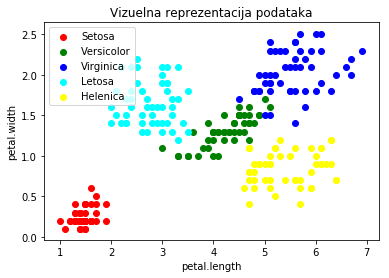

In [21]:
colors = ['red', 'green', 'blue', 'aqua', 'yellow']
legend = []

for (c, v) in zip(colors, variety):
    subsamples = df[df['variety'] == v]
    plt.scatter(subsamples[attr1], subsamples[attr2], color=c)
    legend.append(v)

plt.xlabel(attr1)
plt.ylabel(attr2)
plt.title('Vizuelna reprezentacija podataka')

plt.legend(legend)
plt.show()

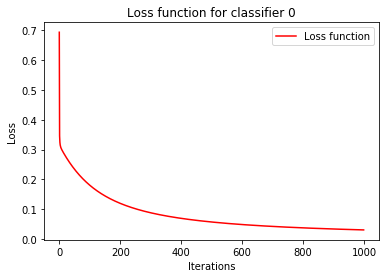

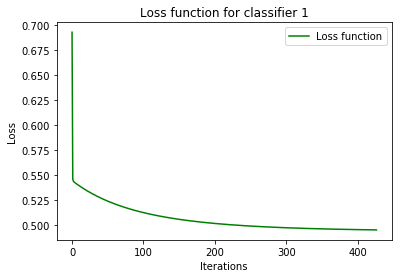

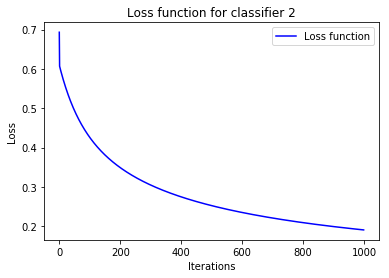

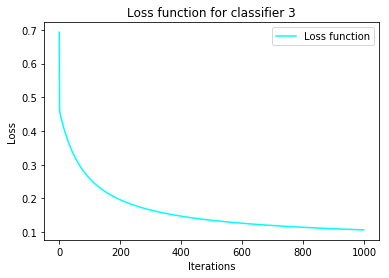

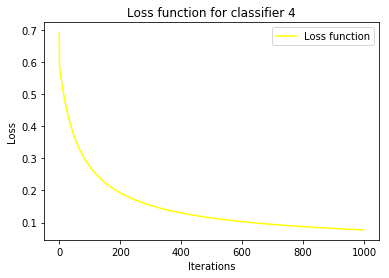

In [58]:
alpha = 0.2
num_iter = 1000
eps=10e-6

models = train_classifiers(X, y, n_classes, alpha, num_iter, eps, plot=True)

In [59]:
print('--- Istrenirani modeli ---')
show_models(models)

--- Istrenirani modeli ---
Model fw_0 za prepoznavanje klase Setosa:
  * f_w = 1 / (1 + exp(-(5.195 + -1.412*petal.length + -3.264*petal.width))
  * Loss = 0.030378316220000926
  * Last iteration: 1000
Model fw_1 za prepoznavanje klase Versicolor:
  * f_w = 1 / (1 + exp(-(-1.788 + 0.099*petal.length + 0.041*petal.width))
  * Loss = 0.0
  * Last iteration: 427
Model fw_2 za prepoznavanje klase Virginica:
  * f_w = 1 / (1 + exp(-(-7.567 + 0.606*petal.length + 2.442*petal.width))
  * Loss = 0.19099249489961753
  * Last iteration: 1000
Model fw_3 za prepoznavanje klase Letosa:
  * f_w = 1 / (1 + exp(-(0.238 + -2.864*petal.length + 6.006*petal.width))
  * Loss = 0.10654063846388892
  * Last iteration: 1000
Model fw_4 za prepoznavanje klase Helenica:
  * f_w = 1 / (1 + exp(-(-4.644 + 2.227*petal.length + -5.781*petal.width))
  * Loss = 0.0770110480348727
  * Last iteration: 1000


In [60]:
petal_length = float(input('Unesite petal.length: '))
petal_width = float(input('Unesite petal.width: '))

In [61]:
x = np.array([1, petal_length, petal_width]).reshape(-1, 1)
f_w, info = predict(models, x, mapping_i_to_name)

print(f'Max f_w: {f_w}')
print(info)

Max f_w: 0.23536942900586846
Vrsta cveta: Virginica
